In [267]:
import torch
import matplotlib.pyplot as plt
from ssnn import SSNN

In [268]:
# Create dataset
x_train = torch.arange(0, 100, 0.5)
x_train = x_train.unfold(0, 20, 1)
x_train = x_train.unsqueeze(-1)

y_train = x_train[:,-1,:]
x_train = x_train[:,0:-1,:]

x_train = 1*torch.sin(x_train)
y_train = 1*torch.sin(y_train)

In [269]:
model = SSNN(1, 2, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [270]:
# training loop
t_loss = []

for epoch in range(200):  # loop over the dataset multiple times
    optimizer.zero_grad()

    outputs = model(x_train)
    outputs = outputs[:, -1, :]

    loss = criterion(outputs, x_train[:, -1, :])

    t_loss.append(loss.item())

    loss.backward()
    optimizer.step()

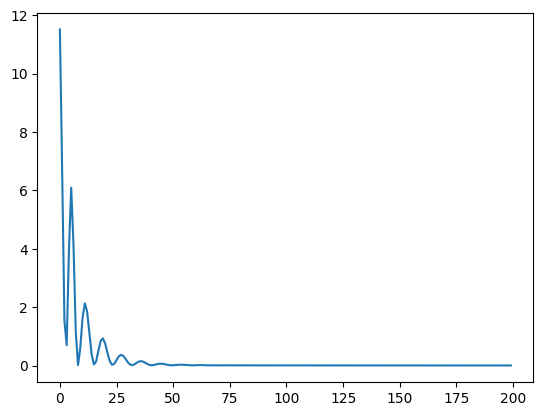

In [271]:
plt.plot(t_loss)

In [272]:
def observability(A:torch.Tensor, C:torch.Tensor):
    with torch.no_grad():
        O = torch.zeros(A.shape[0], C.shape[1])
        for row in range(len(O)):
            O[row] = torch.matmul(C, torch.linalg.matrix_power(A, row))
    return O

O = observability(model.A, model.C)
print(f"Observability matrix O:\n", O)

print(f"Determinant of O", torch.linalg.det(O))

Observability matrix O:
 tensor([[-0.1439,  0.0972, -0.2051],
        [-0.0266, -0.0343,  0.0491],
        [-0.0003, -0.0008, -0.0068]])
Determinant of O tensor(-6.0408e-05)
